In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_dataset = pd.read_csv('titanic_train.csv')
train_dataset.head()
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [3]:
train_dataset.isnull().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


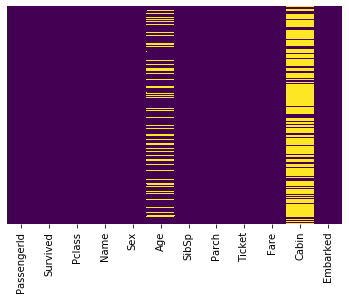

In [4]:
sns.heatmap(train_dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
sns.set_style('whitegrid')

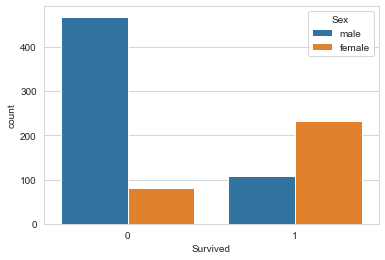

In [6]:
sns.countplot(x='Survived', data=train_dataset, hue='Sex')

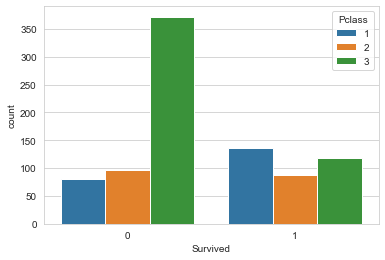

In [7]:
sns.countplot(x='Survived', data=train_dataset, hue='Pclass')

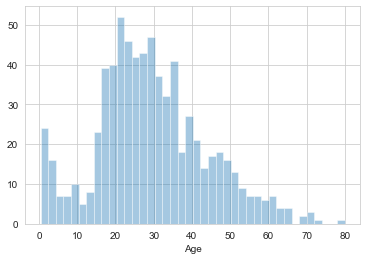

In [8]:
sns.distplot(train_dataset['Age'].dropna(), bins=40, kde=False)

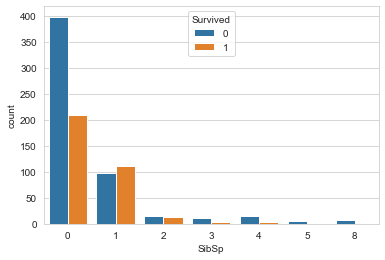

In [9]:
sns.countplot(x= 'SibSp', data=train_dataset, hue='Survived')

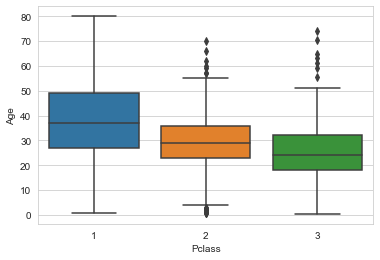

In [10]:
sns.boxplot(x='Pclass', y='Age', data=train_dataset)

In [11]:
def impute_age(cols):
    return train_dataset[train_dataset['Pclass'] == cols[1]]['Age'].mean() if pd.isnull(cols[0]) else cols[0]

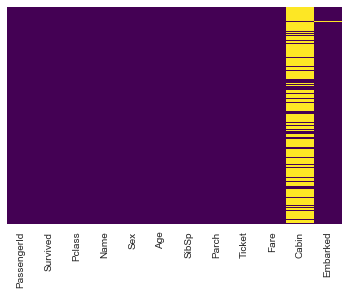

In [12]:
train_dataset['Age'] = train_dataset[['Age','Pclass']].apply(impute_age,axis=1)
sns.heatmap(train_dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [13]:
train_dataset.drop(['Cabin','Fare','Name','Ticket'],axis=1,inplace=True)

In [14]:
train_dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S


In [15]:
sex = pd.get_dummies(train_dataset['Sex'],drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [16]:
embark = pd.get_dummies(train_dataset['Embarked'],drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [17]:
train_dataset = pd.concat([train_dataset,sex,embark],axis=1)
train_dataset.drop(['Sex', 'Embarked', 'PassengerId'], inplace= True,axis=1)
train_dataset.head()

,Survived,Pclass,Age,SibSp,Parch,male,Q,S
0,0,3,22.0,1,0,1,0,1
1,1,1,38.0,1,0,0,0,0
2,1,3,26.0,0,0,0,0,1
3,1,1,35.0,1,0,0,0,1
4,0,3,35.0,0,0,1,0,1


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_dataset.drop('Survived',axis=1), 
                                                    train_dataset['Survived'], test_size=0.30, 
                                                    random_state=101)

In [19]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
pd.DataFrame(data=lr.coef_.transpose(), index=X_train.columns, columns=['Coeff'])

,Coeff
Pclass,-1.180077
Age,-0.040732
SibSp,-0.267964
Parch,-0.048372
male,-2.594084
Q,-0.052236
S,-0.473799


In [21]:
y_pred = lr.predict(X_test)

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       154
           1       0.81      0.68      0.74       114

    accuracy                           0.79       268
   macro avg       0.80      0.78      0.78       268
weighted avg       0.80      0.79      0.79       268



In [24]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[136  18]
 [ 37  77]]


In [27]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=0)
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [28]:
y_pred_grid = grid.predict(X_test)
print(classification_report(y_test,y_pred_grid))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       154
           1       0.82      0.69      0.75       114

    accuracy                           0.81       268
   macro avg       0.81      0.79      0.80       268
weighted avg       0.81      0.81      0.80       268

